# Handling Missing Values.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')







1.   **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  ** Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.   **Name:** Name of passenger
4.  ** Sex: **Sex of the passenger
5.  ** Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.   **Ticket:** Ticket number of the passenger
9.   **Fare: **Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)









In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


df.describe() method gives statistical information about numerical columns of the dataset

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## df.info tells us about column datatypes, non-null counts and memory consumption

# Three columns have missing values : Age, Cabin and Embarked

## Cabin Column

In [7]:
cabin_df = titanic_df['Cabin']

In [8]:
percentage_missing_cabin = (cabin_df.isnull().sum()/(len(titanic_df) * 1.0)) * 100

In [9]:
percentage_missing_cabin

77.10437710437711

### Over 77% values in this column are missing. It's better to drop this column altogether

In [10]:
titanic_df.drop(columns=['Cabin'], inplace=True)
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Embarked Column

In [11]:
embarked_df = titanic_df['Embarked']

In [12]:
embarked_df.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [13]:
embarked_df.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Majority of the passengers embarked from Southampton. Now since there are only 2 missing values, we can replace them with Southampton or 'S'

In [14]:
print(644.0/891)

0.7227833894500562


In [15]:
titanic_df['Embarked'].fillna('S', inplace=True)

# Age Column

<AxesSubplot:>

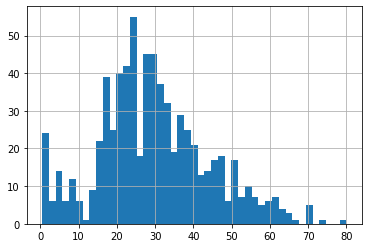

In [16]:
titanic_df['Age'].hist(bins=45)

In [17]:
age_df = titanic_df[['Age','Sex']]

In [18]:
age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.mean()))

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

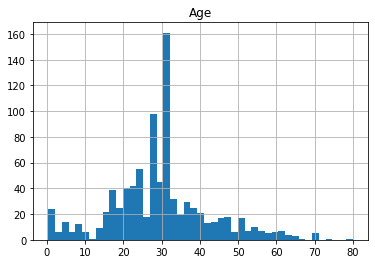

In [19]:
age_df.hist(bins=45)

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

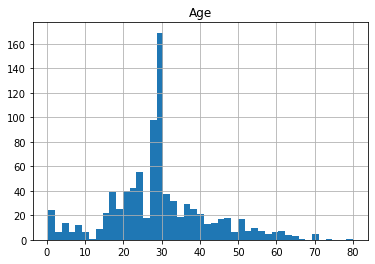

In [20]:
age_df = titanic_df[['Age','Sex']]
age_df['Age'] = age_df.groupby('Sex').transform(lambda x: x.fillna(x.median()))
age_df.hist(bins=45)

### Reimport Dataset, trying other method.

In [21]:
import seaborn as sns
import numpy as np
import datawig

In [22]:
df = pd.read_csv('titanic-data.csv')

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Example we will impute Age column.

<AxesSubplot:>

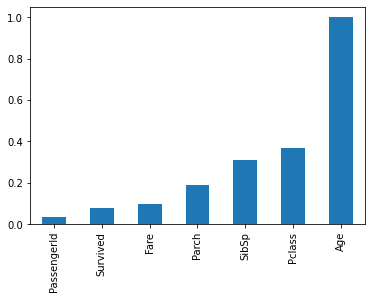

In [24]:
abs(df.corr()['Age']).sort_values().plot(kind='bar')

**Apply datawig and check certain columns with NaN Values.

In [26]:
imputer = datawig.SimpleImputer(
    input_columns=['Pclass','SibSp'],
    output_column='Age')
imputer.fit(train_df = df)
imputed = imputer.predict(df)

2021-09-30 08:43:19,658 [INFO]  
========== start: fit model
2021-09-30 08:43:19,658 [WARNING]  Already bound, ignoring bind()
2021-09-30 08:43:19,713 [INFO]  Epoch[0] Batch [0-26]	Speed: 9037.48 samples/sec	cross-entropy=16.981493	Age-accuracy=0.000000
2021-09-30 08:43:19,759 [INFO]  Epoch[0] Train-cross-entropy=15.843605
2021-09-30 08:43:19,760 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2021-09-30 08:43:19,762 [INFO]  Epoch[0] Time cost=0.099
2021-09-30 08:43:19,767 [INFO]  Saved checkpoint to "age\model-0000.params"
2021-09-30 08:43:19,774 [INFO]  Epoch[0] Validation-cross-entropy=17.584346
2021-09-30 08:43:19,776 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2021-09-30 08:43:19,831 [INFO]  Epoch[1] Batch [0-26]	Speed: 8483.68 samples/sec	cross-entropy=16.411858	Age-accuracy=0.000000
2021-09-30 08:43:19,879 [INFO]  Epoch[1] Train-cross-entropy=15.234140
2021-09-30 08:43:19,880 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2021-09-30 08:43:19,882 [INFO]  Epoch[1] Time cost=0.103

2021-09-30 08:43:21,500 [INFO]  Epoch[14] Validation-cross-entropy=15.581379
2021-09-30 08:43:21,502 [INFO]  Epoch[14] Validation-Age-accuracy=0.000000
2021-09-30 08:43:21,560 [INFO]  Epoch[15] Batch [0-26]	Speed: 7697.87 samples/sec	cross-entropy=14.983002	Age-accuracy=0.000000
2021-09-30 08:43:21,607 [INFO]  Epoch[15] Train-cross-entropy=14.170556
2021-09-30 08:43:21,609 [INFO]  Epoch[15] Train-Age-accuracy=0.000000
2021-09-30 08:43:21,610 [INFO]  Epoch[15] Time cost=0.107
2021-09-30 08:43:21,616 [INFO]  Saved checkpoint to "age\model-0015.params"
2021-09-30 08:43:21,624 [INFO]  Epoch[15] Validation-cross-entropy=15.553105
2021-09-30 08:43:21,625 [INFO]  Epoch[15] Validation-Age-accuracy=0.000000
2021-09-30 08:43:21,678 [INFO]  Epoch[16] Batch [0-26]	Speed: 8661.01 samples/sec	cross-entropy=14.938790	Age-accuracy=0.000000
2021-09-30 08:43:21,722 [INFO]  Epoch[16] Train-cross-entropy=14.135862
2021-09-30 08:43:21,724 [INFO]  Epoch[16] Train-Age-accuracy=0.000000
2021-09-30 08:43:21,72

**Result of Imputed Age, result may vary based on learning epoch.

In [33]:
imputed.loc[(df['Age'].isna()) & (df['Pclass'] == 1),['Age','Pclass','Age_imputed']]

,Age,Pclass,Age_imputed
31,NaN,1,38.650715
55,NaN,1,39.344907
64,NaN,1,39.344907
166,NaN,1,39.344907
168,NaN,1,39.344907
185,NaN,1,39.344907
256,NaN,1,39.344907
270,NaN,1,39.344907
284,NaN,1,39.344907
295,NaN,1,39.344907


**Check Slicing Random Rows.

In [37]:
imputed.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Age_imputed             28.0929
Name: 5, dtype: object